In [ ]:
#Prediction system to predict which user is going to buy a product displayed on a social media advertisement

In [134]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [135]:
mldata = pd.read_csv('D:\DataScience\ML\Social_Network_Ads.csv', header=0)
data = mldata.dropna()
print(data.shape)
print(list(data.columns))

(400, 5)
['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']


In [136]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [137]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [138]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [139]:
#Changing the name of the column from purchased to y

In [140]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [141]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

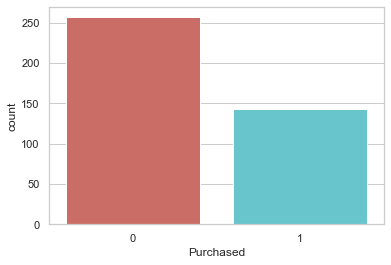

<Figure size 432x288 with 0 Axes>

In [142]:
sns.countplot(x='Purchased',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [143]:
data.groupby('Purchased').mean()

,User ID,Age,EstimatedSalary
Purchased,,,
0,1.569116e+07,32.793774,60544.747082
1,1.569222e+07,46.391608,86272.727273


In [144]:
data.groupby('Gender').mean()

,User ID,Age,EstimatedSalary,Purchased
Gender,,,,
Female,1.569331e+07,38.411765,71759.803922,0.377451
Male,1.568970e+07,36.867347,67642.857143,0.336735


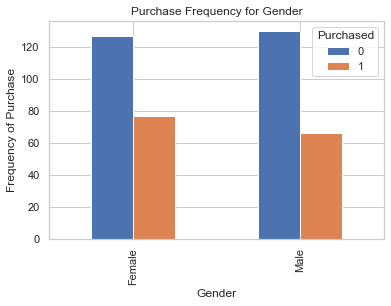

In [145]:
%matplotlib inline
pd.crosstab(data.Gender,data.Purchased).plot(kind='bar')
plt.title('Purchase Frequency for Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_gen')

In [146]:
categorical_vars=['Gender']
for var in categorical_vars:
    categorical_list='var'+'_'+var
    categorical_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(categorical_list)
    data=data1
print(*data)

User ID Gender Age EstimatedSalary Purchased Gender_Female Gender_Male


In [147]:
categorical_vars = ['Gender']
data_vars = data.columns.values.tolist()
data_keep = [i for i in data_vars if i not in categorical_vars]
data_final = data[data_keep]
print(data_vars)
print(data_keep)

['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Female', 'Gender_Male']
['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Female', 'Gender_Male']


In [148]:
data_final_vars = data_final.columns.values.tolist()
y = ['Purchased']
X = [i for i in data_final_vars if i not in y]
print(y)
print(X)

['Purchased']
['User ID', 'Age', 'EstimatedSalary', 'Gender_Female', 'Gender_Male']


In [149]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg,step=18)
rfe = rfe.fit(data_final[X], data_final[y])
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False False]
[1 2 1 2 2]


C:\Users\ADITYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADITYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [156]:
columns = ["User ID", "EstimatedSalary"]
X = data_final[columns]
y = data_final['Purchased']
print(X)
print("")
print(y)

      User ID  EstimatedSalary
0    15624510            19000
1    15810944            20000
2    15668575            43000
3    15603246            57000
4    15804002            76000
..        ...              ...
395  15691863            41000
396  15706071            23000
397  15654296            20000
398  15755018            33000
399  15594041            36000

[400 rows x 2 columns]

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [163]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.584571
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.103     
Dependent Variable: Purchased        AIC:              471.6567  
Date:               2022-08-06 17:39 BIC:              479.6397  
No. Observations:   400              Log-Likelihood:   -233.83   
Df Model:           1                LL-Null:          -260.79   
Df Residuals:       398              LLR p-value:      2.0922e-13
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
User ID           -0.0000   0.0000 -8.1367 0.0000 -0.0000 -0.0000
EstimatedSalary    0.0000   0.0000  6.7940 0.0000  0.0000  0.0000


In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [170]:
y_pred = logreg.predict(X_test)

In [171]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [172]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[77  2]
 [23 18]]


In [173]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86        79
           1       0.90      0.44      0.59        41

    accuracy                           0.79       120
   macro avg       0.83      0.71      0.73       120
weighted avg       0.81      0.79      0.77       120



In [177]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.771
